### Investigates problems related to EBAS Pallas scattering data

In [1]:
import pyaerocom as pya
import matplotlib.pyplot as plt

# this should only read one file
data = pya.io.ReadEbas().read('scatc550aer', station_names='Pallas*',
                                  start_date='2008-01-01',
                                  stop_date='2008-01-31',
                                  datalevel=2,
                                  REMOVE_INVALID_FLAGS=True)

data_lev2 = pya.io.ReadEbas().read('scatc550aer', station_names='Pallas*',
                                  start_date='2008-01-01',
                                  stop_date='2008-01-31',
                                  datalevel=2,
                                  REMOVE_INVALID_FLAGS=True)

Initating pyaerocom configuration
Checking server configuration ...
Checking access to: /lustre/storeA
Access to lustre database: True
Init data paths for lustre
Expired time: 0.019 s


Reading file 1 of 1 (ReadEbas)
Reading file 1 of 1 (ReadEbas)


#### Plot timeseries

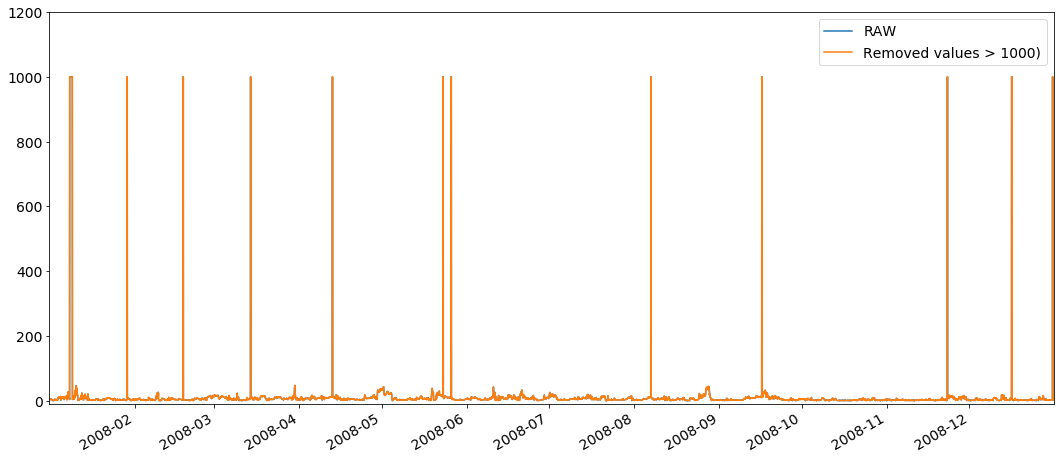

In [2]:
stat = data.to_station_data(0, 'scatc550aer')
ts_raw = stat.scatc550aer

ax = ts_raw.plot(figsize=(18,8), label='RAW', ylim=[-10, 1200])
subset = ts_raw[ts_raw < 1000]
subset.plot(label='Removed values > 1000)', ax=ax)
ax.legend()
plt.show()

#### Further investigate NASA Ames filedata

In [3]:
file = data.metadata[0]['filename']

print(file)

FI0096G.20080101000000.20120221000000.nephelometer..pm10.1y.1h.FI01L_TSI_3563_PAL_dry.FI01L_neph_control_lev1_0_0_1.lev2.nas


In [4]:
path = '/'.join([pya.const.EBASMC_DATA_DIR, file])
path

'/lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/EBASMultiColumn/data/data//FI0096G.20080101000000.20120221000000.nephelometer..pm10.1y.1h.FI01L_TSI_3563_PAL_dry.FI01L_neph_control_lev1_0_0_1.lev2.nas'

In [5]:
filedata = pya.io.ebas_nasa_ames.EbasNasaAmesFile(pya.const.EBASMC_DATA_DIR + '/' + file)
print(filedata)

Pyaerocom EbasNasaAmesFile
--------------------------

   num_head_lines: 96
   num_head_fmt: 1001
   data_originator: Lihavainen, Heikki; Backman, John
   sponsor_organisation: FI01L, Finnish Meteorological Institute, FMI, Atmospheric Composition Unit, Erik Palménin aukio, , FI-00560, Helsinki, Finland
   submitter: Backman, John
   project_association: ACTRIS GAW-WDCA
   vol_num: 1
   vol_totnum: 1
   ref_date: 2008-01-01T00:00:00
   revision_date: 2012-02-21T00:00:00
   freq: 0.0
   descr_time_unit: days from file reference point
   num_cols_dependent: 22
   mul_factors (list, 22 items)
   [1.0
    1.0
    ...
    1.0
    1.0]

   vals_invalid (list, 22 items)
   [999.999999
    9999.99
    ...
    9999.9999
    9.999999]

   descr_first_col: end_time of measurement, days from the file reference point

   Column variable definitions
   -------------------------------
   EbasColDef: name=starttime, unit=days, is_var=False, is_flag=False, flag_col=22, 
   EbasColDef: name=endtime, uni

#### I picked out a line that seems to have missing data encoded

In [6]:
first_line_invalid = 274 #in file
first_line_data = 97

row = first_line_invalid - first_line_data
row

177

#### Investigate invalid values against their definition in file header

In [7]:
# invalid values for each column in the data block should be this
invalid_col_head = filedata.vals_invalid
print(invalid_col_head)

[999.999999, 9999.99, 9999.99, 9999.9999, 9999.9999, 9999.9999, 9999.9999, 9999.9999, 9999.9999, 9999.9999, 9999.9999, 9999.9999, 9999.9999, 9999.9999, 9999.9999, 9999.9999, 9999.9999, 9999.9999, 9999.9999, 9999.9999, 9999.9999, 9.999999]


#### Check values in row with invalid data

In [8]:
# invalid values found in data 
invalid_data_row = filedata.data[row, 1:]
invalid_data_row

array([  7.4167,      nan,      nan, 999.9999, 999.9999, 999.9999,
       999.9999, 999.9999, 999.9999, 999.9999, 999.9999, 999.9999,
       999.9999, 999.9999, 999.9999, 999.9999, 999.9999, 999.9999,
       999.9999, 999.9999, 999.9999,   0.    ])

In [9]:
for i, val in enumerate(invalid_data_row):
    print('Value: {} (invalid flag: {})'.format(val, invalid_col_head[i]))

Value: 7.4167 (invalid flag: 999.999999)
Value: nan (invalid flag: 9999.99)
Value: nan (invalid flag: 9999.99)
Value: 999.9999 (invalid flag: 9999.9999)
Value: 999.9999 (invalid flag: 9999.9999)
Value: 999.9999 (invalid flag: 9999.9999)
Value: 999.9999 (invalid flag: 9999.9999)
Value: 999.9999 (invalid flag: 9999.9999)
Value: 999.9999 (invalid flag: 9999.9999)
Value: 999.9999 (invalid flag: 9999.9999)
Value: 999.9999 (invalid flag: 9999.9999)
Value: 999.9999 (invalid flag: 9999.9999)
Value: 999.9999 (invalid flag: 9999.9999)
Value: 999.9999 (invalid flag: 9999.9999)
Value: 999.9999 (invalid flag: 9999.9999)
Value: 999.9999 (invalid flag: 9999.9999)
Value: 999.9999 (invalid flag: 9999.9999)
Value: 999.9999 (invalid flag: 9999.9999)
Value: 999.9999 (invalid flag: 9999.9999)
Value: 999.9999 (invalid flag: 9999.9999)
Value: 999.9999 (invalid flag: 9999.9999)
Value: 0.0 (invalid flag: 9.999999)


## PROBLEM FORMULATION

As can be seen, the definition of invalid values for each column in the header does not match the actual numbers in the data block. 